In [1]:
import pandas as pd
import numpy as np

In [2]:
root_dir ="/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/ExperimentResults/"
extra_path = ("DDimsNS_NewLongerDriftEvalExp_MSEs_1024NPaths").replace(
            ".", "")
score_eval=pd.read_parquet(root_dir + extra_path+ "_score_MSE.parquet", engine="fastparquet")
nad_eval=pd.read_parquet(root_dir + extra_path+ "_nad_MSE.parquet")
nad_eval_true_law=pd.read_parquet(root_dir + extra_path+"_nad_true_law_MSE.parquet")
score_eval_true_law=pd.read_parquet(root_dir + extra_path+"_score_true_law_MSE.parquet")
score_state_eval=pd.read_parquet(root_dir + extra_path+ "_score_state_MSE.parquet")
nad_state_eval=pd.read_parquet(root_dir + extra_path+ "_nad_state_MSE.parquet")
stable_state_eval = (pd.concat([score_state_eval.rename({d:d+" Score State" for d in score_state_eval.columns}, axis=1),nad_state_eval.rename({d:d+" Nadaraya State" for d in score_state_eval.columns}, axis=1)], axis=1))
stable_true_law_eval = (pd.concat([score_eval_true_law.rename({d:d+" Score True" for d in score_state_eval.columns}, axis=1),nad_eval_true_law.rename({d:d+" Nadaraya True" for d in score_state_eval.columns}, axis=1)], axis=1))
stable_alt_law_eval = (pd.concat([score_eval.rename({d:d+" Score" for d in score_state_eval.columns}, axis=1),nad_eval.rename({d:d+" Nadaraya" for d in score_state_eval.columns}, axis=1)], axis=1))

In [3]:
time_ax = np.linspace(1/256, 1/256*(stable_true_law_eval.shape[0]),stable_true_law_eval.shape[0])

In [4]:
true_law_eval = stable_true_law_eval.sort_index(axis=1).set_index(time_ax)

In [5]:
alt_law_eval = stable_alt_law_eval.sort_index(axis=1).set_index(time_ax)

In [6]:
state_eval = stable_state_eval.iloc[1:, :].sort_index(axis=1).set_index(time_ax)**2

In [7]:
true_law_eval

,12DDimsNS Nadaraya True,12DDimsNS Score True,8DDimsNS Nadaraya True,8DDimsNS Score True
0.003906,254.024170,315.130829,175.047150,189.380707
0.007812,402.361206,467.949036,263.505554,275.855835
0.011719,508.641968,576.888590,319.024699,332.046549
0.015625,582.984619,654.765991,371.136322,385.219788
0.019531,634.523877,707.877637,409.516162,424.593750
...,...,...,...,...
4.984375,1608.810835,1789.891066,1085.699745,1249.172414
4.988281,1608.804229,1789.893500,1085.688038,1249.171985
4.992188,1608.780516,1789.888302,1085.684859,1249.166667
4.996094,1608.740129,1789.852619,1085.689308,1249.170641


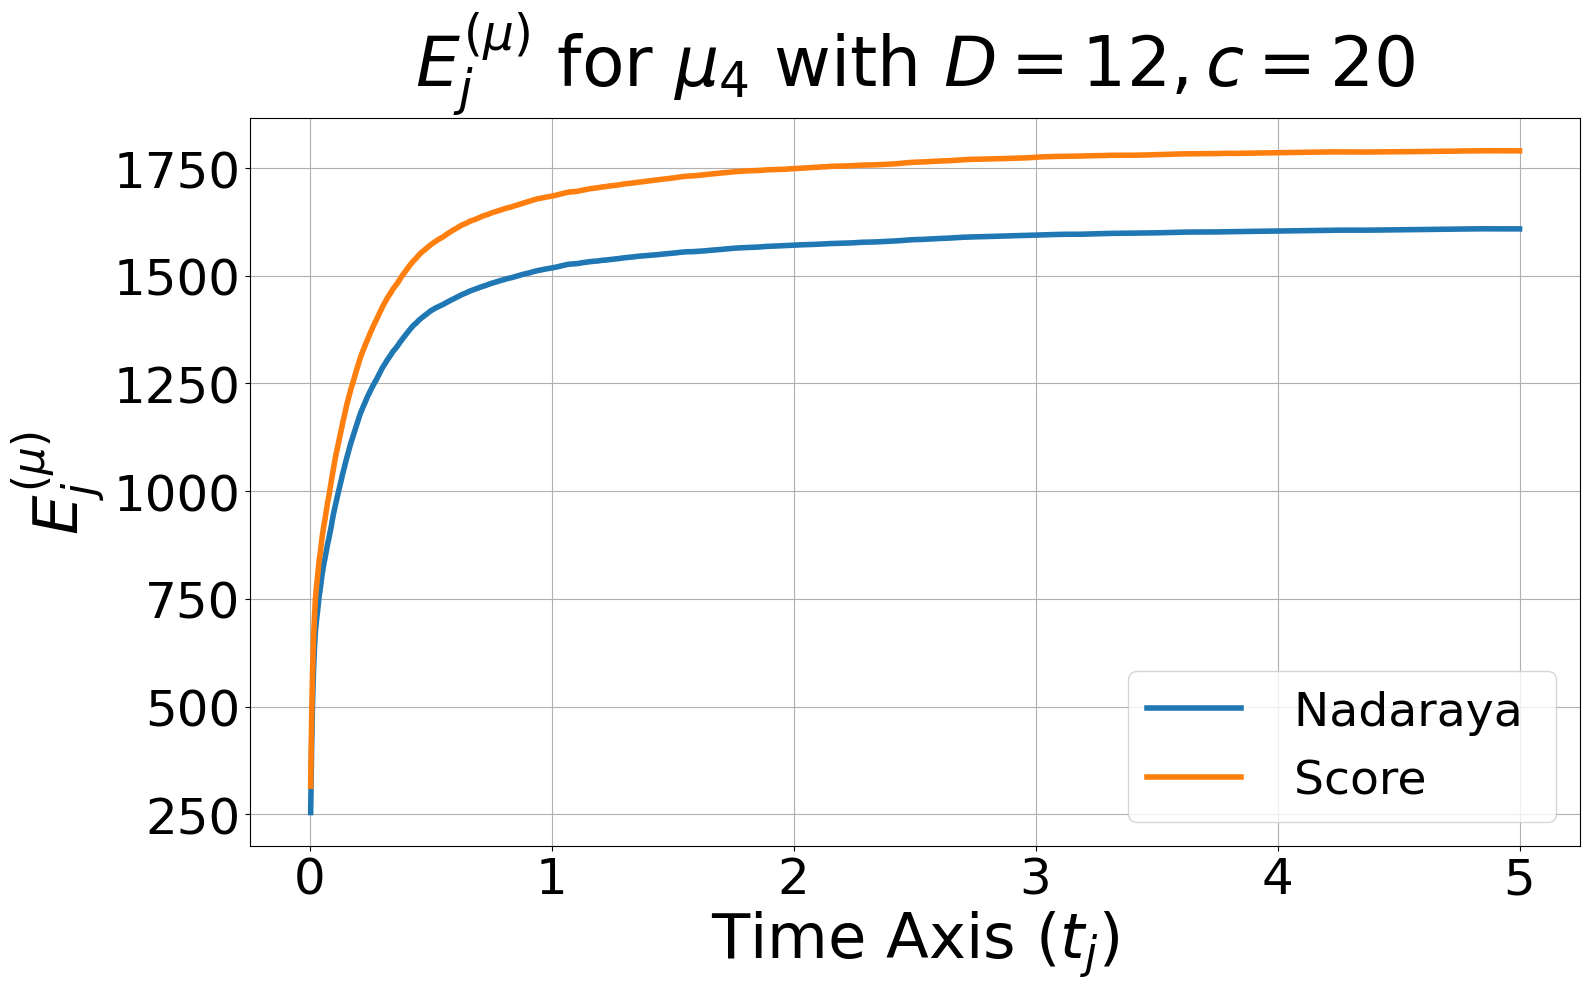

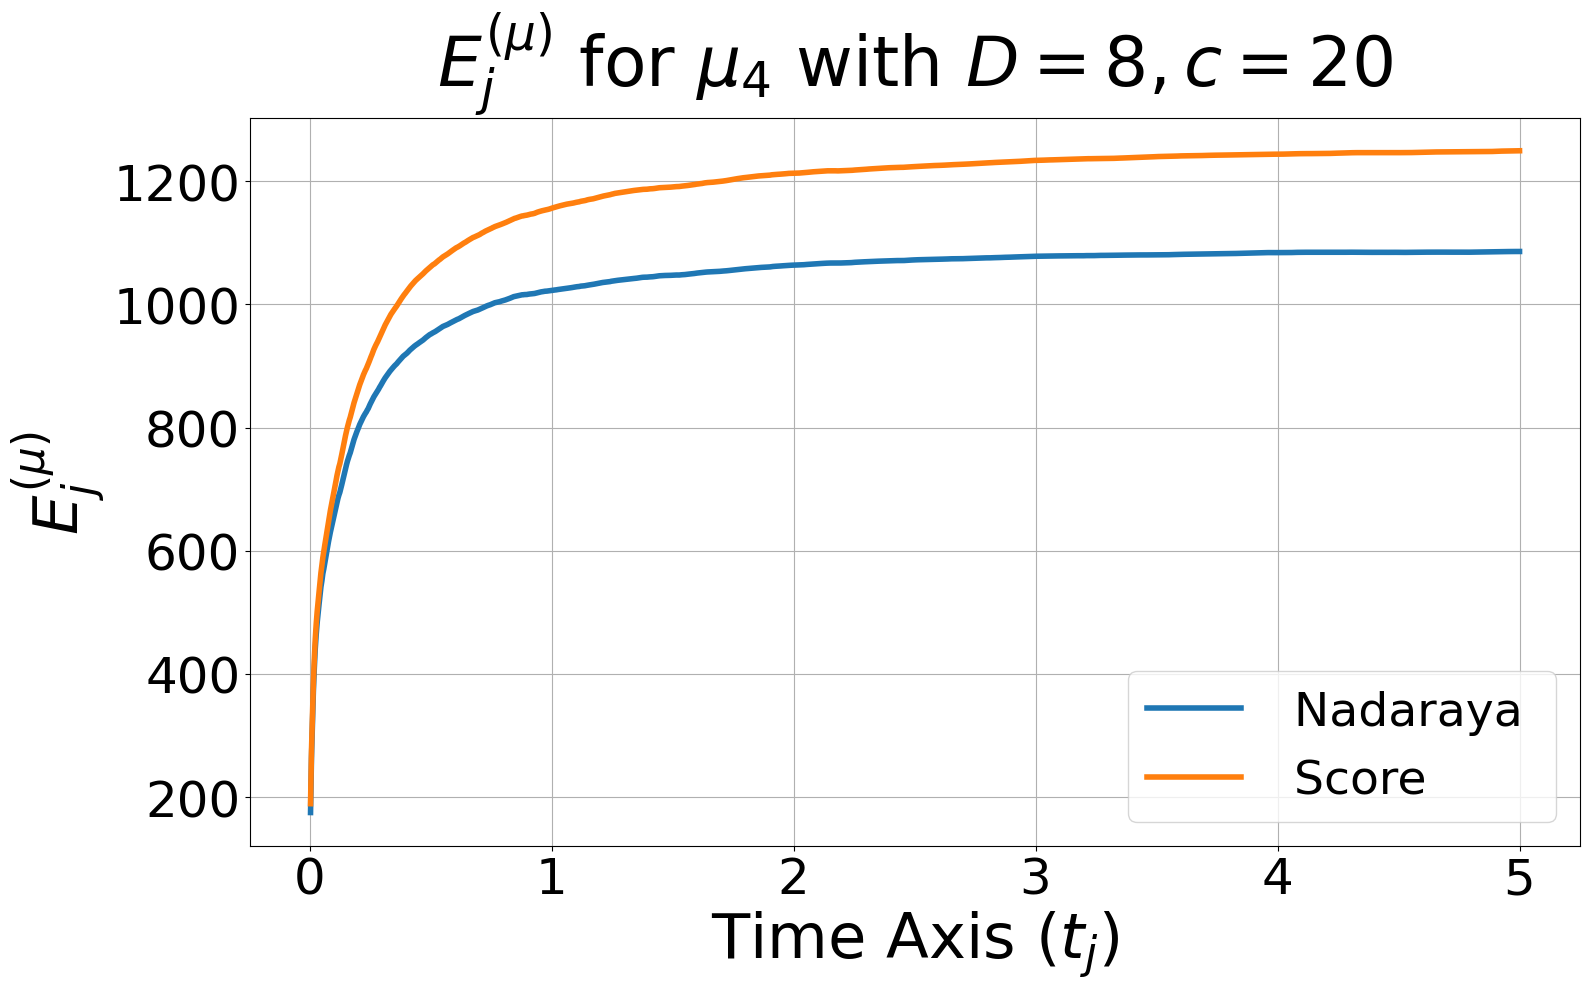

In [8]:
import matplotlib.pyplot as plt
for k in range(0, true_law_eval.shape[1], 2):
    fig, ax = plt.subplots(figsize=(16, 10))
    currevals = true_law_eval.iloc[:, k:k+2]
    d = true_law_eval.columns[k].split('DDimsNS')[0]
    currevals.rename({d:d.split("DDimsNS")[-1].replace("True", "") for d in currevals.columns}, axis=1).plot(ax=ax, linewidth=4)
    plt.legend(fontsize=34)
    ax.tick_params(labelsize=36)
    plt.title(rf"$E^{{(\mu)}}_j$ for $\mu_4$ with $D={d}, c=20$", fontsize=50)
    plt.ylabel(rf"$E^{{(\mu)}}_j$", fontsize=45)
    plt.xlabel("Time Axis ($t_j$)", fontsize=45)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/DiffusionModelPresentationImages/LessData/{d}DDimsNSTrueLawOOSLessData.png")
    plt.show()
    plt.close()

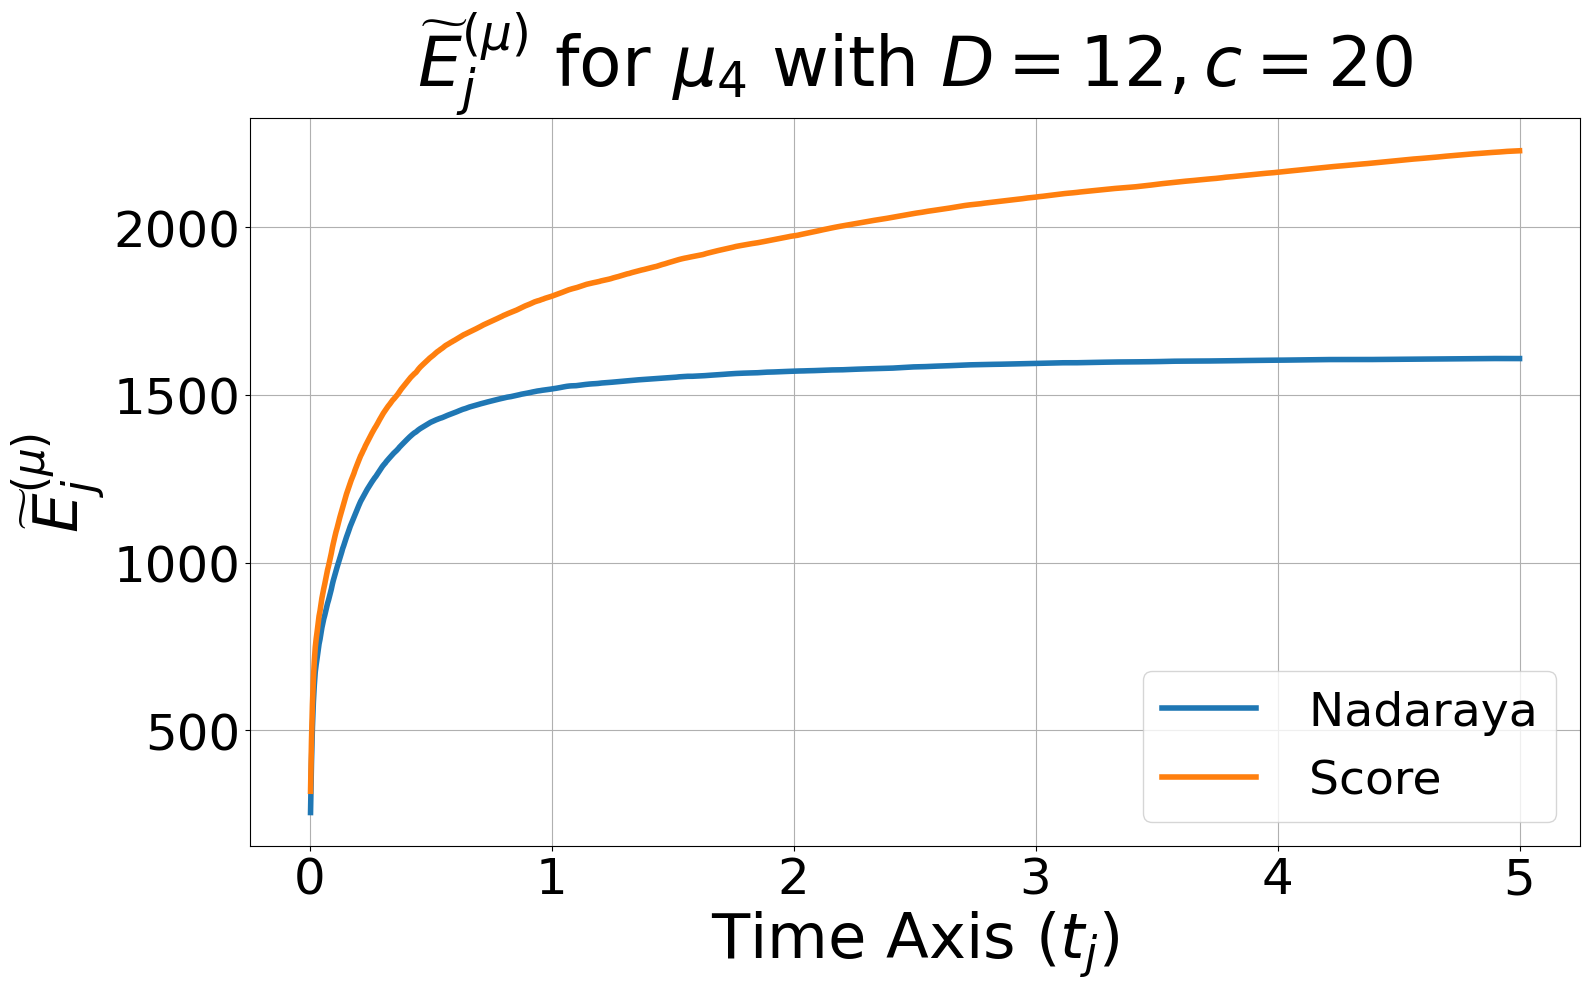

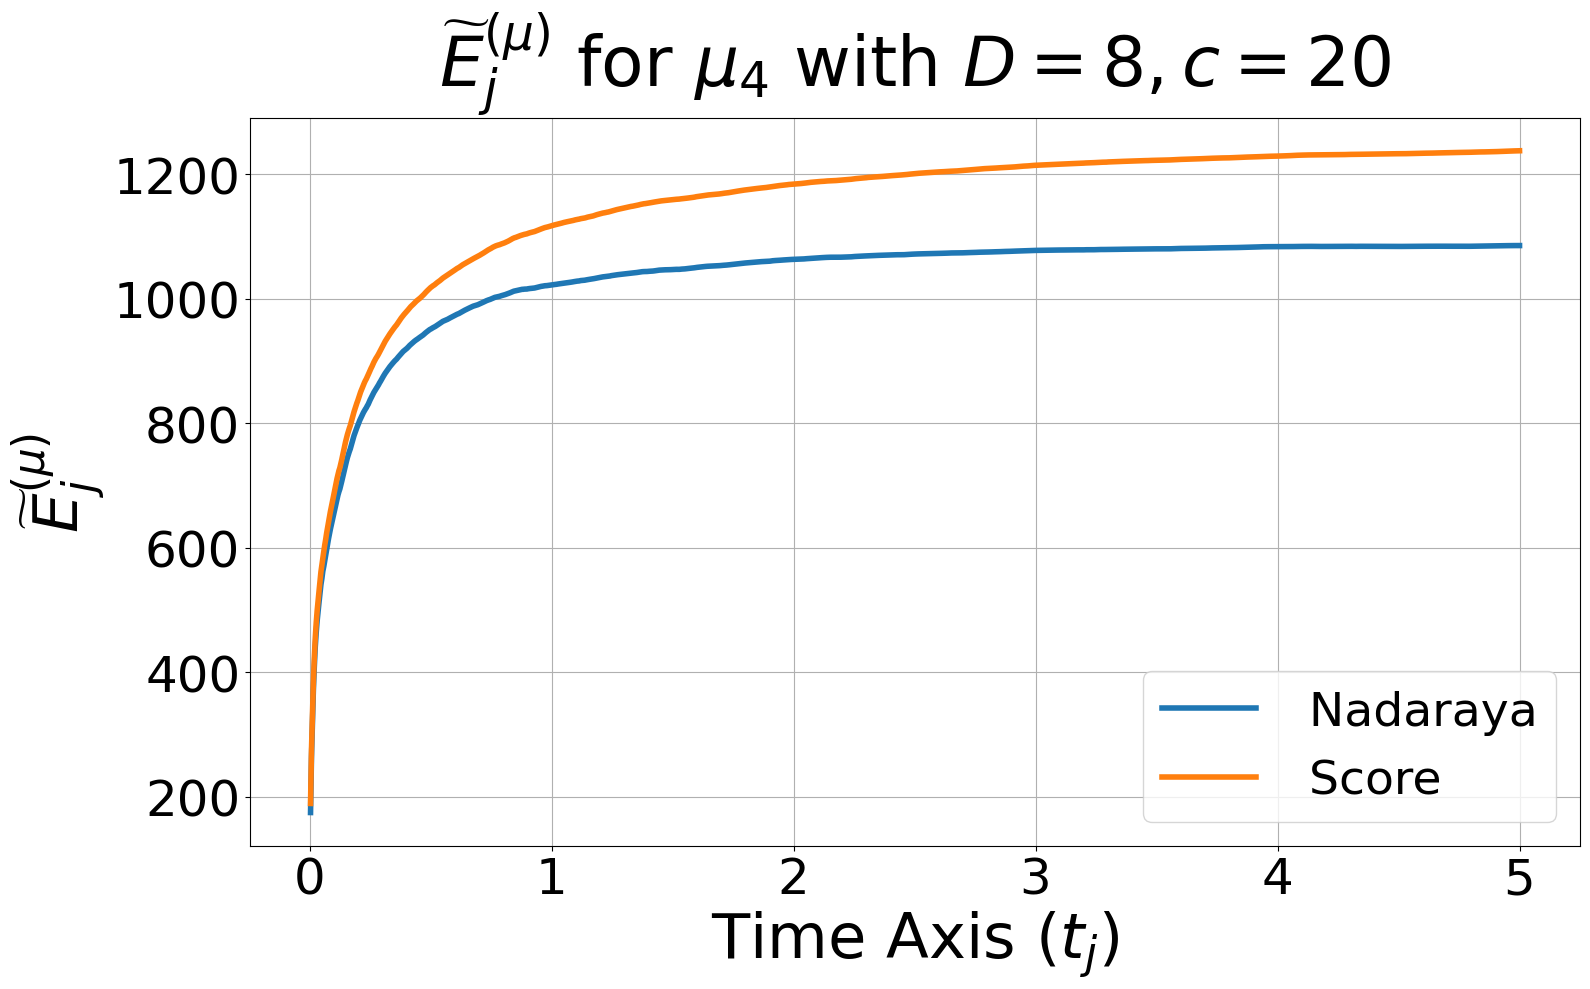

In [9]:
import matplotlib.pyplot as plt
for k in range(0, alt_law_eval.shape[1], 2):
    fig, ax = plt.subplots(figsize=(16, 10))
    currevals = alt_law_eval.iloc[:, k:k+2]
    currevals.rename({d:d.split("DDimsNS")[-1].replace("True", "") for d in currevals.columns}, axis=1).plot(ax=ax, linewidth=4)
    plt.legend(fontsize=34)
    ax.tick_params(labelsize=36)
    d = alt_law_eval.columns[k].split('DDimsNS')[0]
    plt.title(rf"${{\widetilde{{E}}}}^{{(\mu)}}_j$ for $\mu_4$ with $D={d}, c=20$", fontsize=50)
    plt.ylabel(rf"${{\widetilde{{E}}}}^{{(\mu)}}_j$", fontsize=45)
    plt.xlabel("Time Axis ($t_j$)", fontsize=45)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/DiffusionModelPresentationImages/LessData/{d}DDimsNSAltLawOOSLessData.png")
    plt.show()
    plt.close()

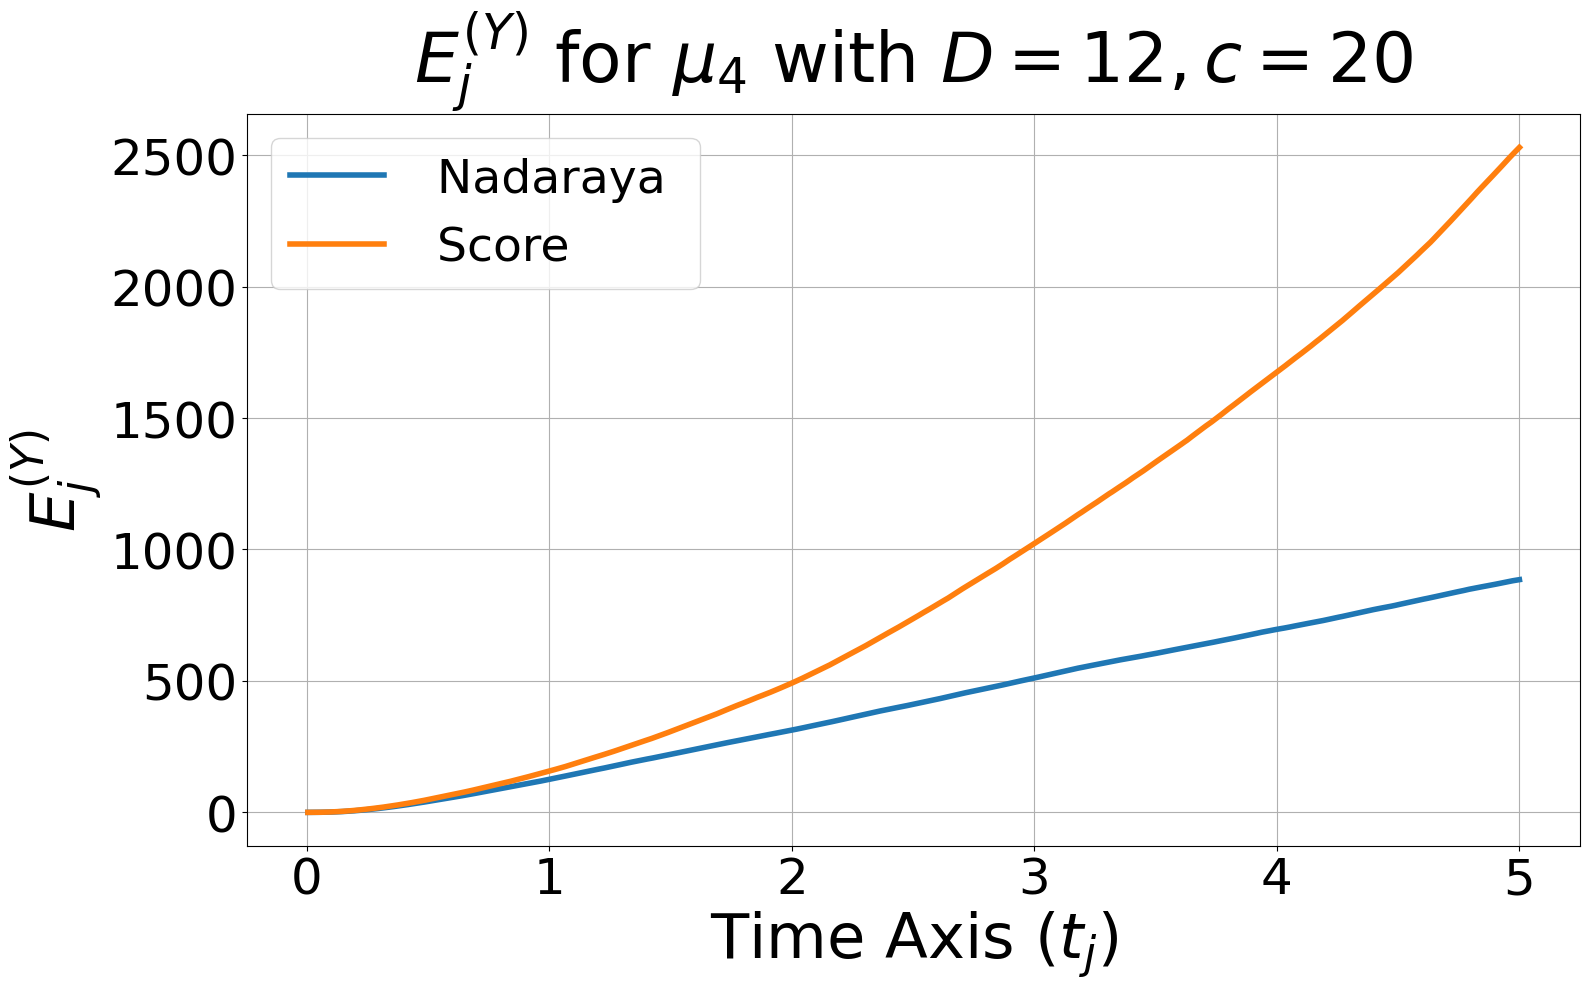

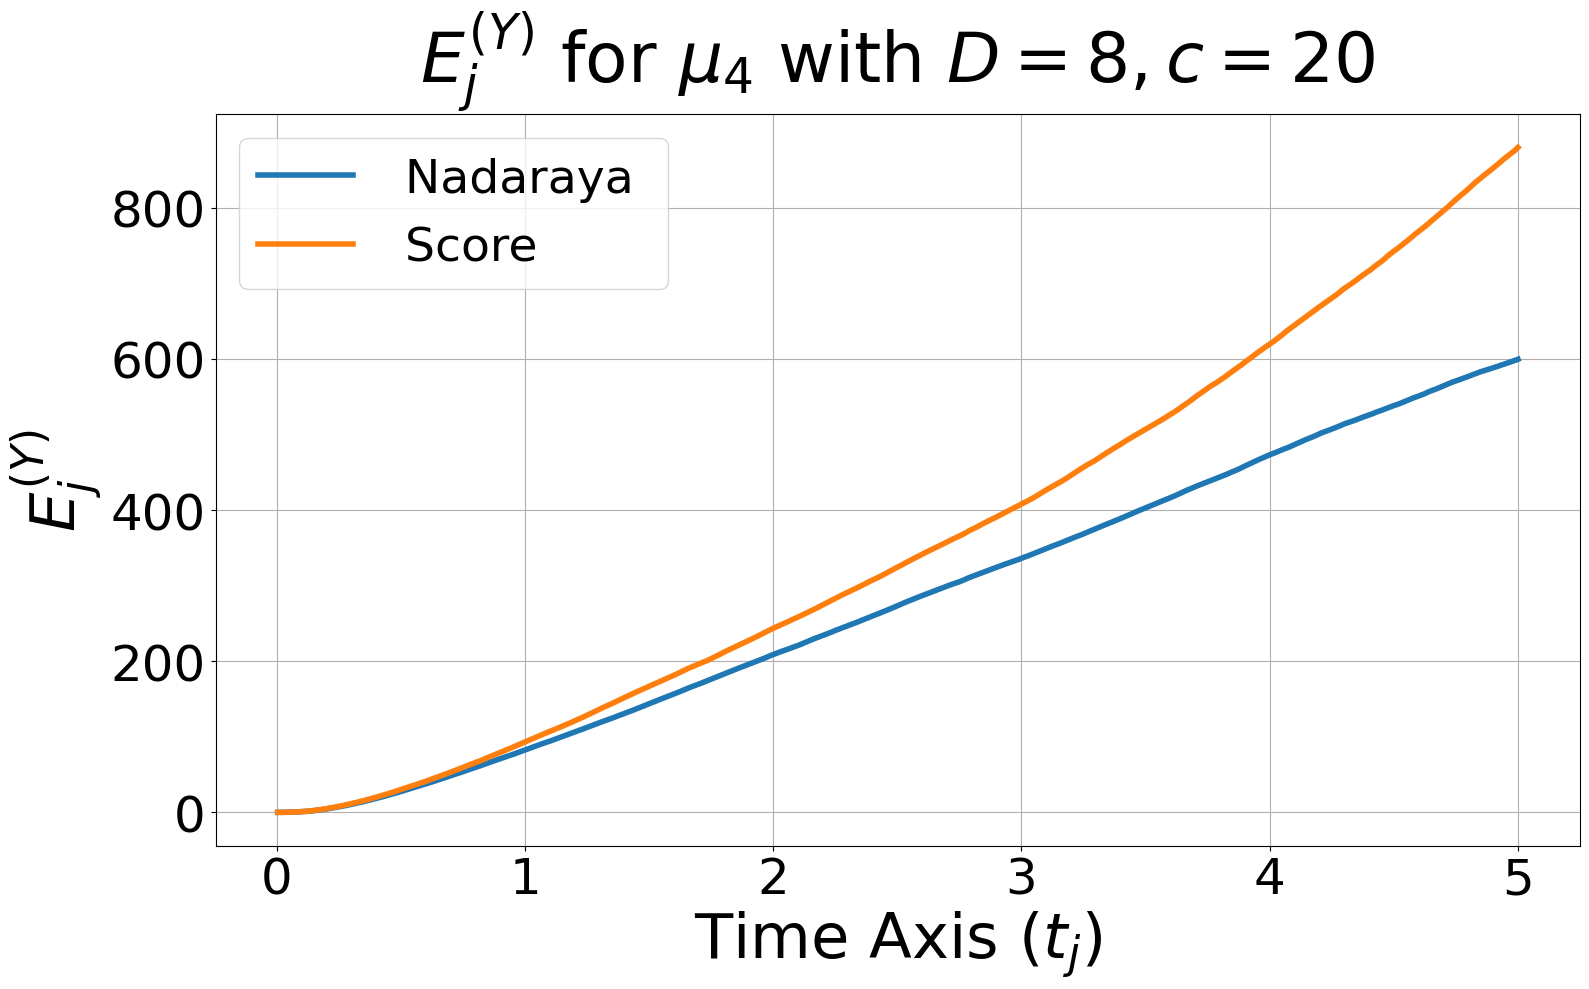

In [10]:
import matplotlib.pyplot as plt
for k in range(0, state_eval.shape[1], 2):
    fig, ax = plt.subplots(figsize=(16, 10))
    currevals = state_eval.iloc[:, k:k+2]
    currevals.rename({d:d.split("DDimsNS")[-1].replace("State", "") for d in currevals.columns}, axis=1).plot(ax=ax, linewidth=4)
    plt.legend(fontsize=34)
    ax.tick_params(labelsize=36)
    d = state_eval.columns[k].split('DDimsNS')[0]
    plt.title(rf"$E^{{(Y)}}_j$ for $\mu_4$ with $D={d}, c=20$", fontsize=50)
    plt.ylabel(rf"$E^{{(Y)}}_j$", fontsize=45)
    plt.xlabel("Time Axis ($t_j$)", fontsize=45)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/DiffusionModelPresentationImages/LessData/{d}DDimsNSStateErrorOOSLessData.png")
    plt.show()
    plt.close()

In [11]:
s=(true_law_eval.iloc[[-1], :].T.assign(D=lambda x: x.index.map(lambda y:int(y.split('DDimsNS')[0]))).assign(T=lambda x: x.index.map(lambda y:"_Nadaraya" if "Nad" in y else "Score")).sort_values("T", axis=0).set_index("D").groupby(level=0, axis=0, group_keys=True).apply(lambda x: x.set_index("T"))).iloc[:, 0].unstack(level=-1).round(3)
s

T,Score,_Nadaraya
D,,
8,1249.205,1085.728
12,1789.835,1608.716


In [12]:
s=(alt_law_eval.iloc[[-1], :].T.assign(D=lambda x: x.index.map(lambda y:int(y.split('DDimsNS')[0]))).assign(T=lambda x: x.index.map(lambda y:"_Nadaraya" if "Nad" in y else "Score")).sort_values("T", axis=0).set_index("D").groupby(level=0, axis=0, group_keys=True).apply(lambda x: x.set_index("T"))).iloc[:, 0].unstack(level=-1).round(3)
s

T,Score,_Nadaraya
D,,
8,1237.988,1085.727
12,2228.784,1608.715


In [13]:
s=(state_eval.iloc[[-1], :].T.assign(D=lambda x: x.index.map(lambda y:int(y.split('DDimsNS')[0]))).assign(T=lambda x: x.index.map(lambda y:"_Nadaraya" if "Nad" in y else "Score")).sort_values("T", axis=0).set_index("D").groupby(level=0, axis=0, group_keys=True).apply(lambda x: x.set_index("T"))).iloc[:, 0].unstack(level=-1).round(3)
s

T,Score,_Nadaraya
D,,
8,879.841,599.509
12,2529.167,885.202
